In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def compute_conformity_scores(scores, l=0., kreg=0.):
    '''                                                                                                                                                                                                            
    Get conformity score of every class for each bbox.                                                                                                                                                             
    '''
    sorted_idxs = np.argsort(-scores)
    sorted_scores = []
    for s, sid in zip (scores, sorted_idxs):
        sorted_scores.append(s[sid])
    sorted_scores = np.stack(sorted_scores)
        
    conformity_score = np.cumsum(sorted_scores, axis=1)
    
    reg = np.clip( l * (np.arange(1,scores.shape[1]+1)-kreg), 0, None )
    
    conformity_score += reg

    return conformity_score, sorted_idxs


In [4]:
scores_atss_calib = np.load('/home/thmegy/mountfinn/mmdet/results_conformal_prediction/atss/scores_calib.npy')
scores_atss_test = np.load('/home/thmegy/mountfinn/mmdet/results_conformal_prediction/atss/scores_test.npy')
gt_labels_calib = np.load('/home/thmegy/mountfinn/mmdet/results_conformal_prediction/atss/gt_label_calib.npy')
gt_labels_test = np.load('/home/thmegy/mountfinn/mmdet/results_conformal_prediction/atss/gt_label_test.npy')


## Tests with "empty" class

In [39]:
scores_atss_tempsigmoid_calib = np.load('/home/thmegy/mountfinn/mmdet/results_conformal_prediction/atss_tempScalingSigmoid/scores_calib.npy')
scores_atss_tempsigmoid_test = np.load('/home/thmegy/mountfinn/mmdet/results_conformal_prediction/atss_tempScalingSigmoid_perClassThr/scores_test.npy')


In [52]:
cs, sorted_idxs = compute_conformity_scores(scores_atss_tempsigmoid_test)

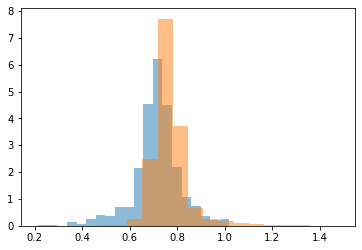

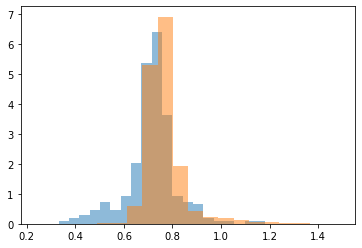

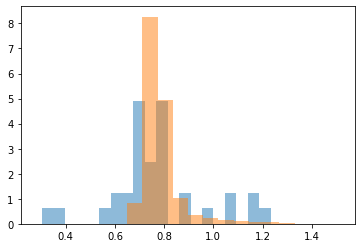

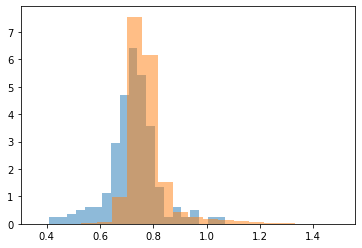

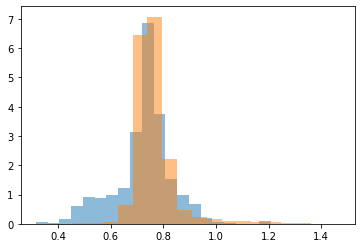

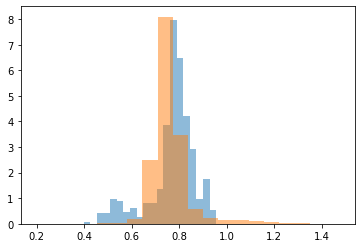

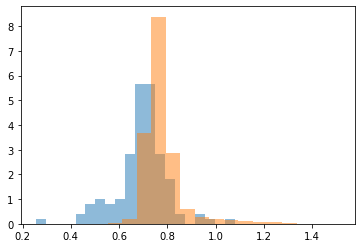

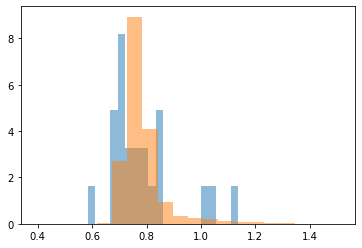

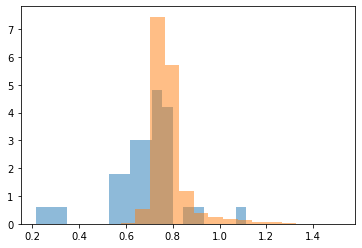

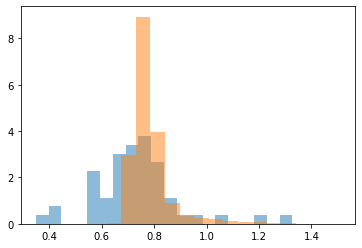

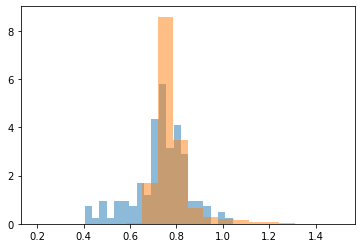

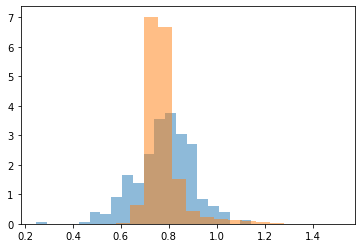

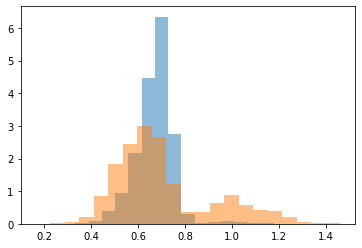

In [58]:
for i in range(13):
    plt.hist(cs[sorted_idxs==i][gt_labels_test==i], bins=20, density=True, alpha=0.5)
    plt.hist(cs[sorted_idxs==i][gt_labels_test!=i], bins=20, density=True, alpha=0.5)
    plt.show()

In [26]:
argmax = scores_atss_test.argmax(axis=1)
comp = np.where(argmax==gt_labels_test, 1, 0)
for i in range(13):
    print(comp[gt_labels_test==i].sum() / len(comp[gt_labels_test==i]))
print(comp.sum() / len(comp))

0.22451612903225807
0.20948616600790515
0.17142857142857143
0.2530612244897959
0.2985553772070626
0.14638783269961977
0.3
0.22727272727272727
0.21621621621621623
0.2222222222222222
0.35384615384615387
0.5519287833827893
0.9740893373123016
0.9250754754401815


In [27]:
argmax = scores_atss_tempsigmoid_test.argmax(axis=1)
comp = np.where(argmax==gt_labels_test, 1, 0)
for i in range(13):
    print(comp[gt_labels_test==i].sum() / len(comp[gt_labels_test==i]))
print(comp.sum() / len(comp))

0.17935483870967742
0.18972332015810275
0.14285714285714285
0.2163265306122449
0.2696629213483146
0.10836501901140684
0.24166666666666667
0.13636363636363635
0.1891891891891892
0.18518518518518517
0.33076923076923076
0.5222551928783383
0.9815499028942257
0.9295268736640296


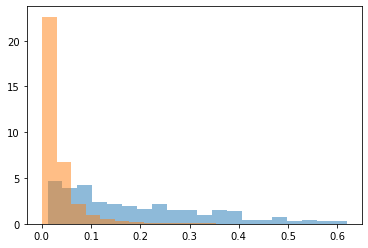

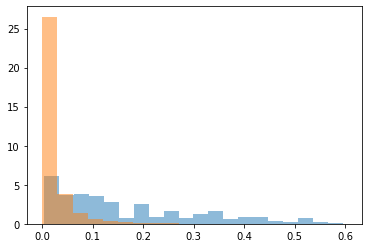

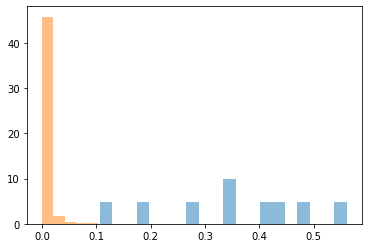

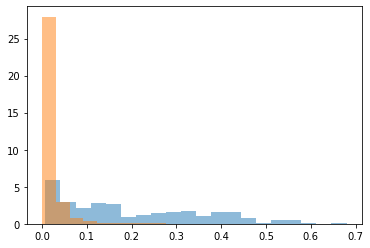

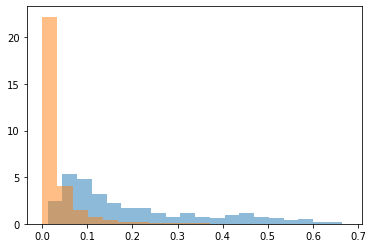

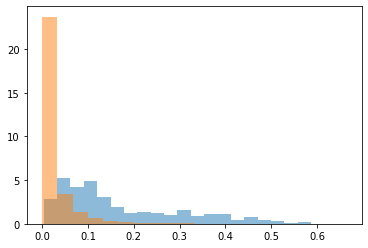

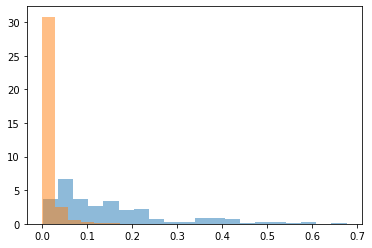

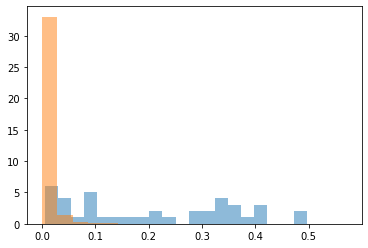

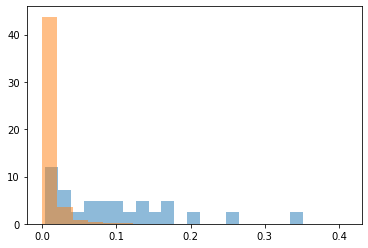

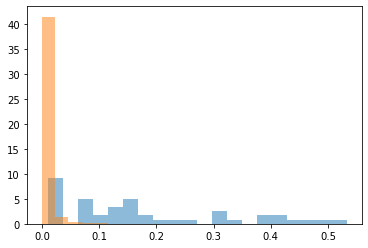

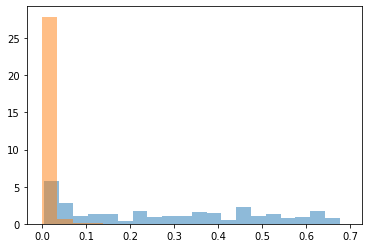

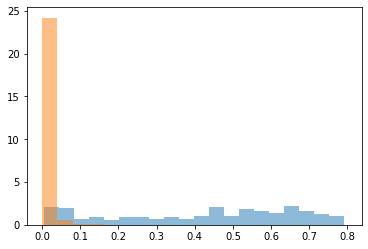

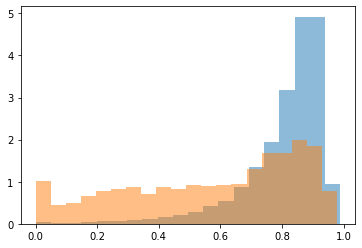

In [35]:
for i in range(13):
    _ = plt.hist(scores_atss_calib[gt_labels_calib==i][:,i], bins=20, density=True, alpha=0.5)
    _ = plt.hist(scores_atss_calib[gt_labels_calib!=i][:,i], bins=20, density=True, alpha=0.5)
    plt.show()

In [38]:
scores_atss_tempsigmoid_calib.shape

(81892, 13)

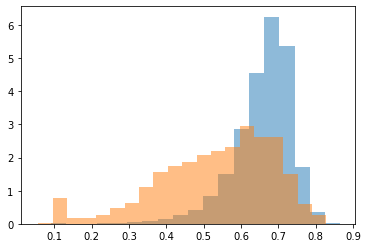

In [40]:
_ = plt.hist(scores_atss_tempsigmoid_calib[gt_labels_calib==12][:,12], bins=20, density=True, alpha=0.5)
_ = plt.hist(scores_atss_tempsigmoid_calib[gt_labels_calib!=12][:,12], bins=20, density=True, alpha=0.5)

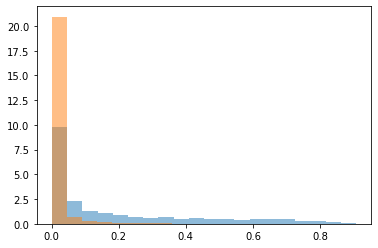

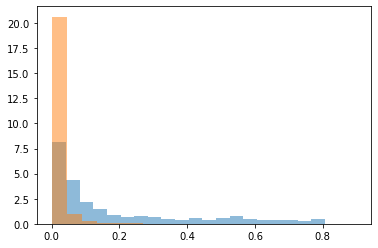

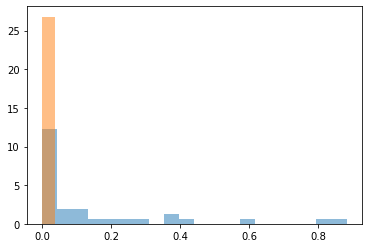

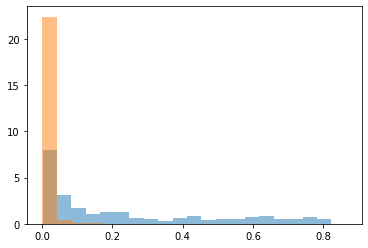

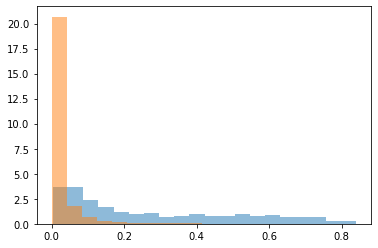

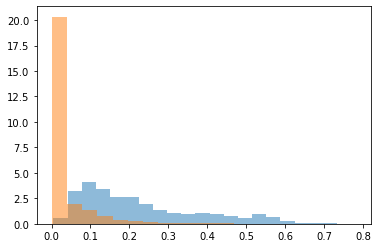

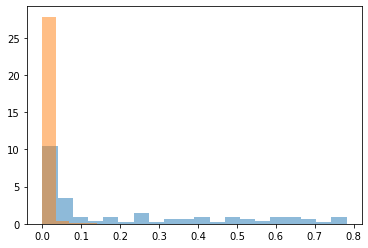

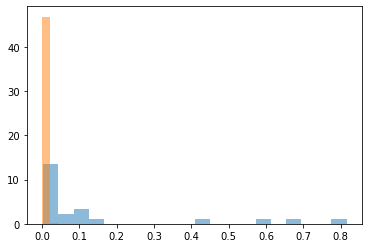

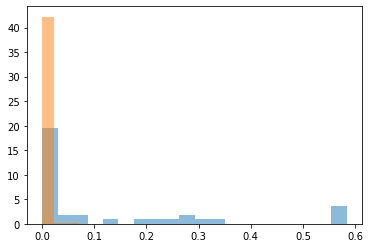

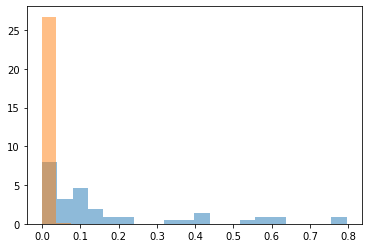

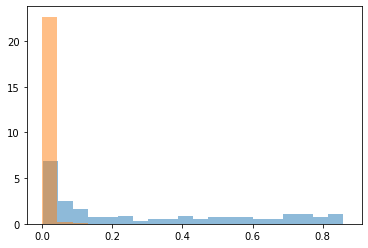

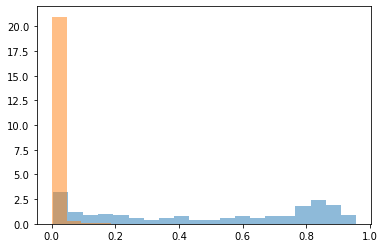

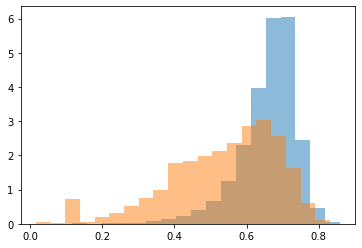

In [42]:
for i in range(13):
    _ = plt.hist(scores_atss_tempsigmoid_test[gt_labels_test==i][:,i], bins=20, density=True, alpha=0.5)
    _ = plt.hist(scores_atss_tempsigmoid_test[gt_labels_test!=i][:,i], bins=20, density=True, alpha=0.5)
    plt.show()

(array([4.5000e+01, 3.0300e+02, 8.1600e+02, 1.8460e+03, 4.5270e+03,
        1.1910e+04, 1.4576e+04, 5.7000e+01, 1.1000e+01, 2.0000e+00]),
 array([0.18219203, 0.29584768, 0.4095033 , 0.52315897, 0.6368146 ,
        0.7504703 , 0.8641259 , 0.97778153, 1.0914372 , 1.2050928 ,
        1.3187485 ], dtype=float32),
 <BarContainer object of 10 artists>)

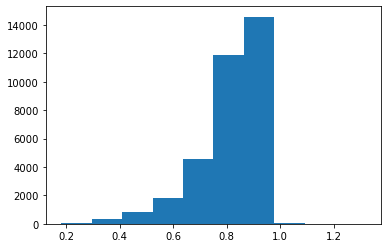

In [86]:
# conformity-scores calibration-curve for empty class
conformity_scores, sorted_idxs = compute_conformity_scores(scores_atss_calib[gt_labels_calib==12])
box_id, true_class_ranking = np.where( sorted_idxs==np.expand_dims(gt_labels_calib[gt_labels_calib==12], axis=1) )
cs_true_class_calib = conformity_scores[box_id, true_class_ranking]
plt.hist(cs_true_class_calib)

In [75]:
scores_noempty_calib = scores_atss_calib[:,:-1][gt_labels_calib!=12]
scores_noempty_test = scores_atss_test[:,:-1][gt_labels_test!=12]

(array([714., 528., 330., 275., 254., 151., 100.,  57.,   8.,   3.]),
 array([0.00762451, 0.10167369, 0.19572288, 0.28977206, 0.38382125,
        0.47787043, 0.5719196 , 0.66596884, 0.760018  , 0.8540672 ,
        0.94811636], dtype=float32),
 <BarContainer object of 10 artists>)

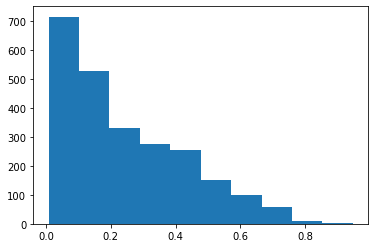

In [89]:
# conformity-scores calibration-curve for degradation classes
conformity_scores, sorted_idxs = compute_conformity_scores(scores_noempty_calib)
box_id, true_class_ranking = np.where( sorted_idxs==np.expand_dims(gt_labels_calib[gt_labels_calib!=12], axis=1) )
true_class_conformity_score = conformity_scores[box_id, true_class_ranking]
plt.hist(cs_true_class_calib)

In [91]:
np.quantile(true_class_conformity_score, 0.9, method='higher')

0.5275816

In [92]:
conformity_scores, sorted_idxs = compute_conformity_scores(scores_noempty_test)


(array([1212.,   35.,   32.,   40.,   63.,   60.,   83.,   86.,  133.,
         144.,  249., 1020.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 <BarContainer object of 12 artists>)

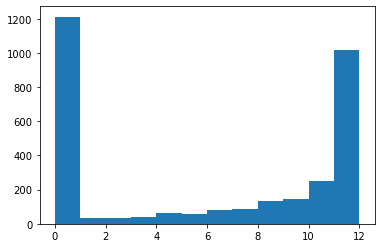

In [98]:
plt.hist( (conformity_scores > 0.5275).sum(axis=1), bins=12)

(array([1.5287e+04, 1.6904e+04, 7.1240e+03, 2.9810e+03, 1.5780e+03,
        9.1700e+02, 3.9600e+02, 1.5200e+02, 3.4000e+01, 6.0000e+00]),
 array([0.10964553, 0.2931246 , 0.47660363, 0.66008264, 0.8435617 ,
        1.0270407 , 1.2105198 , 1.3939989 , 1.5774778 , 1.7609569 ,
        1.944436  ], dtype=float32),
 <BarContainer object of 10 artists>)

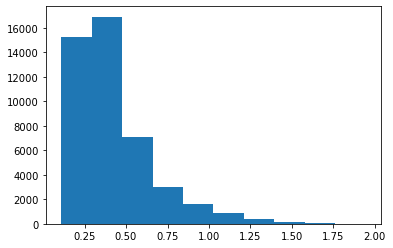

In [100]:
plt.hist(scores_atss_test[:,:-1].sum(axis=1))

## Select chosen fraction of true bboxes and apply CP

In [5]:
scores_calib = scores_atss_calib[:,:-1] # remove empty class
scores_test = scores_atss_test[:,:-1] # remove empty class

### Find chosen fraction of true boxes
Goal: select bboxes such that some fraction (eg 90%) of ground-truth objects are selected.  
Metric: sum of scores

In [9]:
alpha = 0.8

In [10]:
scores_calib_sum = scores_calib.sum(axis=1)

score_thr = np.quantile(scores_calib_sum[gt_labels_calib != 12], 1-alpha, method='higher')
score_thr

0.21585052

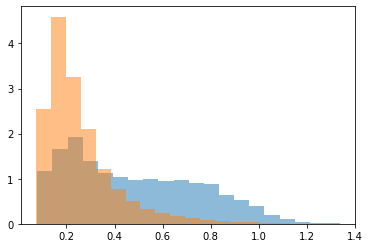

In [11]:
_ = plt.hist(scores_calib_sum[gt_labels_calib != 12], bins=20, alpha=0.5, density=True)
_ = plt.hist(scores_calib_sum[gt_labels_calib == 12], bins=20, alpha=0.5, density=True)

In [54]:
scores_test_sum = scores_test.sum(axis=1)

print(f'Fraction of bboxes left = {(scores_test_sum>score_thr).sum() / len(scores_test_sum)}')
print(f'Fraction of true bboxes selected =\
      {(scores_test_sum[gt_labels_test != 12]>score_thr).sum() / len(scores_test_sum[gt_labels_test != 12])}')

Fraction of bboxes left = 0.5098168257102117
Fraction of true bboxes selected =      0.8167420814479638


### Apply CP to true positive bboxes

In [81]:
# parameters for regularisation
l = 0.1
kreg = 1

In [82]:
scores_calib_object = scores_calib[scores_calib_sum>score_thr]
gt_labels_calib_object = gt_labels_calib[scores_calib_sum>score_thr]

cs_calib, sorted_idxs = compute_conformity_scores(scores_calib_object, l=l, kreg=kreg)

box_id, true_class_ranking = np.where( sorted_idxs==np.expand_dims(gt_labels_calib_object, axis=1) )

cs_thr = np.quantile(cs_calib[box_id, true_class_ranking], 0.9, method='higher')
cs_thr

0.6080525

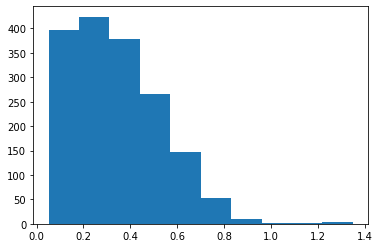

In [83]:
_ = plt.hist(cs_calib[box_id, true_class_ranking])

In [106]:
scores_test_object = scores_test[scores_test_sum>score_thr]
gt_labels_test_object = gt_labels_test[scores_test_sum>score_thr]

conformity_scores, sorted_idxs = compute_conformity_scores(scores_test_object, l=l, kreg=kreg)

# construct prediction set of every bbox
size_list = []
ranking_list = [] # ranking of true class based on predicted scores
covered_list = []

for cs, idxs, gt_label in zip(conformity_scores, sorted_idxs, gt_labels_test_object): #loop over bboxes
    prediction_set = idxs[cs<=cs_thr]

    # do not allow empty sets
    if len(prediction_set) == 0:
        prediction_set = [idxs[0]]

    size_list.append(len(prediction_set))
    if gt_label != 12:
        ranking_list.append(np.where(idxs==gt_label)[0].item())
        covered_list.append(gt_label in prediction_set)

size, ranking, covered = np.array(size_list), np.array(ranking_list), np.array(covered_list)

In [107]:
size.mean()

3.6161790017211706

In [108]:
covered.sum() / len(covered)

0.9506001846722069

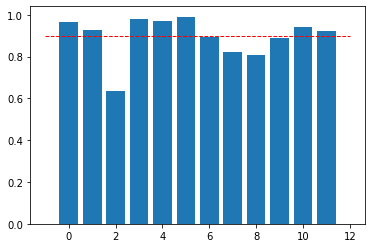

In [109]:
coverage_list = []
for icls in range(12):
    mask = (gt_labels_test_object[gt_labels_test_object!=12] == icls)
    coverage = covered[mask].sum() / len(covered[mask])
    coverage_list.append(coverage)

plt.bar(range(12), coverage_list)
plt.plot([-1, len(coverage_list)], [0.9,0.9], color='red', linestyle='--', linewidth=1)

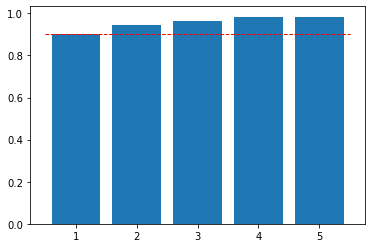

In [110]:
coverage_list = []
for isize in range(size[gt_labels_test_object != 12].max()):
    mask = (size[gt_labels_test_object != 12] == isize+1)
    coverage = covered[mask].sum() / len(covered[mask])
    coverage_list.append(coverage)

plt.bar(range(1,len(coverage_list)+1), coverage_list)
plt.plot([0.5, len(coverage_list)+0.5], [0.9,0.9], color='red', linestyle='--', linewidth=1)

(array([576., 464., 426., 511., 189.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.]),
 <BarContainer object of 12 artists>)

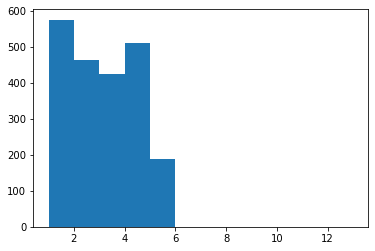

In [111]:
plt.hist(size[gt_labels_test_object != 12], bins=np.linspace(1,13,13))

(array([ 454., 1052., 2027., 5211., 3034.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.]),
 <BarContainer object of 12 artists>)

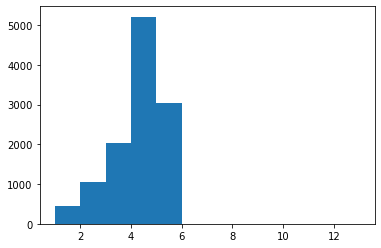

In [112]:
plt.hist(size[gt_labels_test_object == 12], bins=np.linspace(1,13,13))

<ipython-input-113-add69ad88c23>:3: RuntimeWarning: invalid value encountered in divide
  mean = ticks @ size_matrix / size_matrix.sum(axis=0)


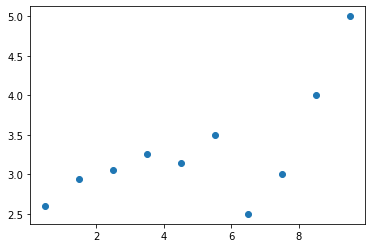

In [113]:
size_matrix = np.histogram2d(size[gt_labels_test_object != 12], ranking, bins=[np.arange(13)+0.5, np.arange(13)-0.5])[0]
ticks = np.linspace(1, 12, 12).astype(int)
mean = ticks @ size_matrix / size_matrix.sum(axis=0)

plt.scatter(ticks-0.5, mean)

(array([1828.,  209.,   80.,   27.,    7.,    8.,    2.,    3.,    2.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <BarContainer object of 9 artists>)

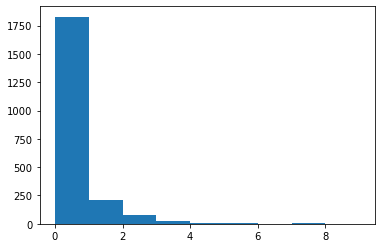

In [114]:
plt.hist(ranking, bins=ranking.max())